# MNIST fashion data set

## Loading the MNIST fashion data set

In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Exploring the format of the MNIST fashion data set

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_images)

60000

In [5]:
train_images.ndim

3

In [6]:
train_images.dtype

dtype('uint8')

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

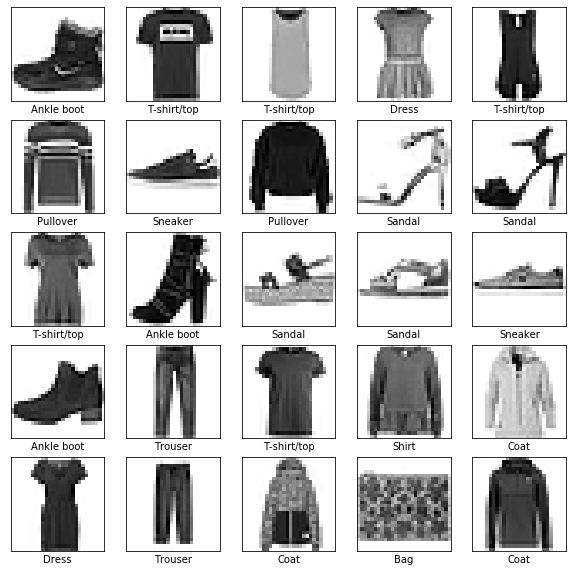

In [11]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

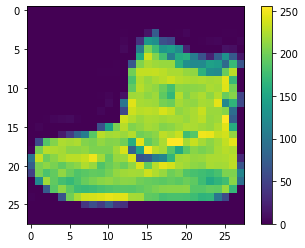

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Underfit Model

In [15]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 2.0110 - acc: 0.1985 - val_loss: 1.7872 - val_acc: 0.2954
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 1.6574 - acc: 0.3547 - val_loss: 1.5319 - val_acc: 0.3906
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 1.4330 - acc: 0.4583 - val_loss: 1.3453 - val_acc: 0.4889
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 1.2703 - acc: 0.5018 - val_loss: 1.2077 - val_acc: 0.5202
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 1.1617 - acc: 0.5333 - val_loss: 1.1248 - val_acc: 0.5591
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 1.0885 - acc: 0.5644 - val_loss: 1.0605 - val_acc: 0.5924
Epoch 7/10
60000/60000 [===========

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.8779 - acc: 0.7036
Test accuracy: 0.7036


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

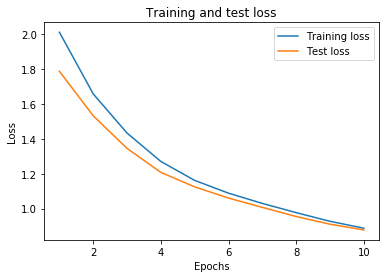

In [18]:
plt.plot(epochs_range, loss_values, label='Training loss')
plt.plot(epochs_range, test_loss_values, label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

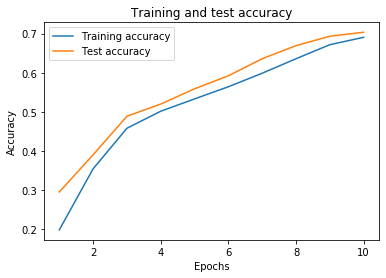

In [20]:
plt.plot(epochs_range, acc_values, label='Training accuracy')
plt.plot(epochs_range, test_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Overfit Model

In [36]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(9992, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 135us/sample - loss: 0.4807 - acc: 0.8285 - val_loss: 0.4420 - val_acc: 0.8488
Epoch 2/30
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3615 - acc: 0.8681 - val_loss: 0.3842 - val_acc: 0.8658
Epoch 3/30
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3203 - acc: 0.8818 - val_loss: 0.3589 - val_acc: 0.8725
Epoch 4/30
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2978 - acc: 0.8898 - val_loss: 0.3514 - val_acc: 0.8742
Epoch 5/30
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2766 - acc: 0.8973 - val_loss: 0.3392 - val_acc: 0.8761
Epoch 6/30
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2638 - acc: 0.9022 - val_loss: 0.3400 - val_acc: 0.8756
Epoch 7/30
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2502 - acc: 0.9063 - val_l

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.4379 - acc: 0.8954
Test accuracy: 0.8954


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

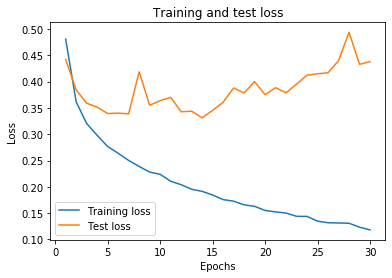

In [39]:
plt.plot(epochs_range, loss_values, label='Training loss')
plt.plot(epochs_range, test_loss_values, label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

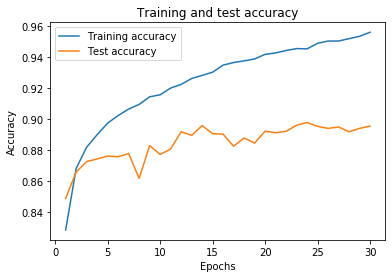

In [41]:
plt.plot(epochs_range, acc_values, label='Training accuracy')
plt.plot(epochs_range, test_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Good Model

In [36]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 124us/sample - loss: 0.8340 - acc: 0.6930 - val_loss: 0.5979 - val_acc: 0.7849
Epoch 2/15
60000/60000 [==============================] - 7s 120us/sample - loss: 0.5506 - acc: 0.8008 - val_loss: 0.5225 - val_acc: 0.8113
Epoch 3/15
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4840 - acc: 0.8256 - val_loss: 0.4770 - val_acc: 0.8293
Epoch 4/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4423 - acc: 0.8413 - val_loss: 0.4479 - val_acc: 0.8379
Epoch 5/15
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4166 - acc: 0.8495 - val_loss: 0.4491 - val_acc: 0.8359
Epoch 6/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3966 - acc: 0.8557 - val_loss: 0.4137 - val_acc: 0.8523
Epoch 7/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3804 - acc: 0.8623 - val_l

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3665 - acc: 0.8715
Test accuracy: 0.8715


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

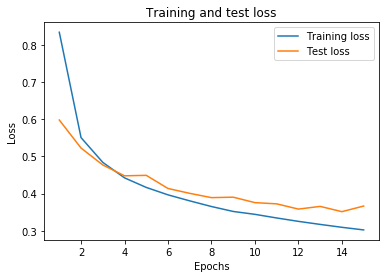

In [39]:
plt.plot(epochs_range, loss_values, label='Training loss')
plt.plot(epochs_range, test_loss_values, label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

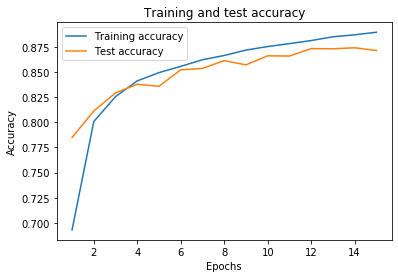

In [41]:
plt.plot(epochs_range, acc_values, label='Training accuracy')
plt.plot(epochs_range, test_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()